In [13]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [14]:
db = sqlite3.connect('../data/checking-logs.sqlite')

In [15]:
query = """
SELECT uid, 
        timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""

df = pd.io.sql.read_sql(query, db, parse_dates=['timestamp'])
df

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


Нужно проанализирвоать поведение пользователей по дням недели и по часам

In [16]:
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.dayofweek
df

,uid,timestamp,hour,weekday
0,user_4,2020-04-17 05:19:02.744528,5,4
1,user_4,2020-04-17 05:22:35.249331,5,4
2,user_4,2020-04-17 05:22:45.549397,5,4
3,user_4,2020-04-17 05:34:14.691200,5,4
4,user_4,2020-04-17 05:34:24.422370,5,4
...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,20,3
3203,user_1,2020-05-21 20:22:41.785725,20,3
3204,user_1,2020-05-21 20:22:41.877806,20,3
3205,user_1,2020-05-21 20:37:00.129678,20,3


In [17]:
day_of_week = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thusday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
df = df.drop('timestamp', axis = 1)
df['weekday'] = df['weekday'].map(day_of_week)
df

,uid,hour,weekday
0,user_4,5,Friday
1,user_4,5,Friday
2,user_4,5,Friday
3,user_4,5,Friday
4,user_4,5,Friday
...,...,...,...
3202,user_1,20,Thusday
3203,user_1,20,Thusday
3204,user_1,20,Thusday
3205,user_1,20,Thusday


In [18]:
columns = df.groupby('uid').count().sort_values('hour', ascending=False).index
columns

Index(['user_4', 'user_14', 'user_2', 'user_25', 'user_19', 'user_26',
       'user_20', 'user_31', 'user_10', 'user_3', 'user_29', 'user_13',
       'user_28', 'user_24', 'user_12', 'user_8', 'user_1', 'user_21',
       'user_30', 'user_18', 'user_17', 'user_16', 'user_27', 'user_15',
       'user_6', 'user_7', 'user_22', 'user_11', 'user_23', 'user_0'],
      dtype='object', name='uid')

In [19]:
weekday_user = df.groupby(['weekday', 'uid']).size().unstack(fill_value=0)
weekday_user = weekday_user.reindex(columns=columns)

weekday_user

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
Friday,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0
Monday,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,2,0,0,3
Saturday,0,79,31,66,21,16,3,90,4,3,...,32,0,0,4,2,0,0,0,0,0
Sunday,45,26,13,44,51,69,28,7,2,8,...,0,31,27,20,9,0,1,8,0,0
Thusday,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,2,0,6,0
Tuesday,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,5,3,0,0,0
Wednesday,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,3,0,0,0,0


In [20]:
hour_user = df.groupby(['hour', 'uid']).size().unstack(fill_value=0)
hour_user = hour_user.reindex(columns=columns)

 Создаем фигуру и ось

Отображаем данные как изображение

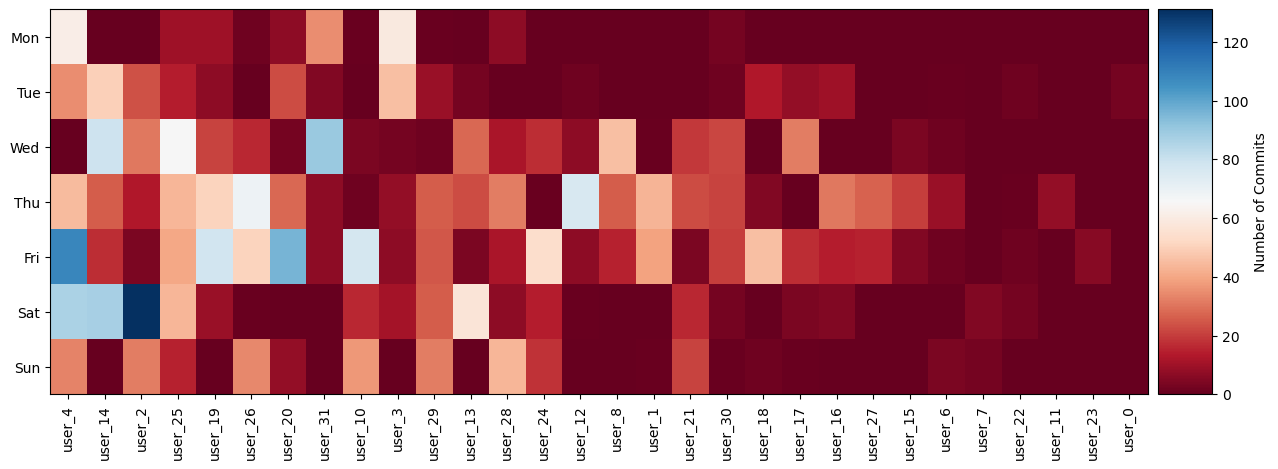

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
im = ax.imshow(weekday_user.values, cmap='RdBu', aspect='auto')
# Настройка делений осей
ax.set_xticks(range(len(weekday_user.columns)))
ax.set_xticklabels(weekday_user.columns, rotation=90)
ax.set_yticks(range(len(weekday_user.index)))
ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Добавление цветовой шкалы
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='Number of Commits')

plt.show()

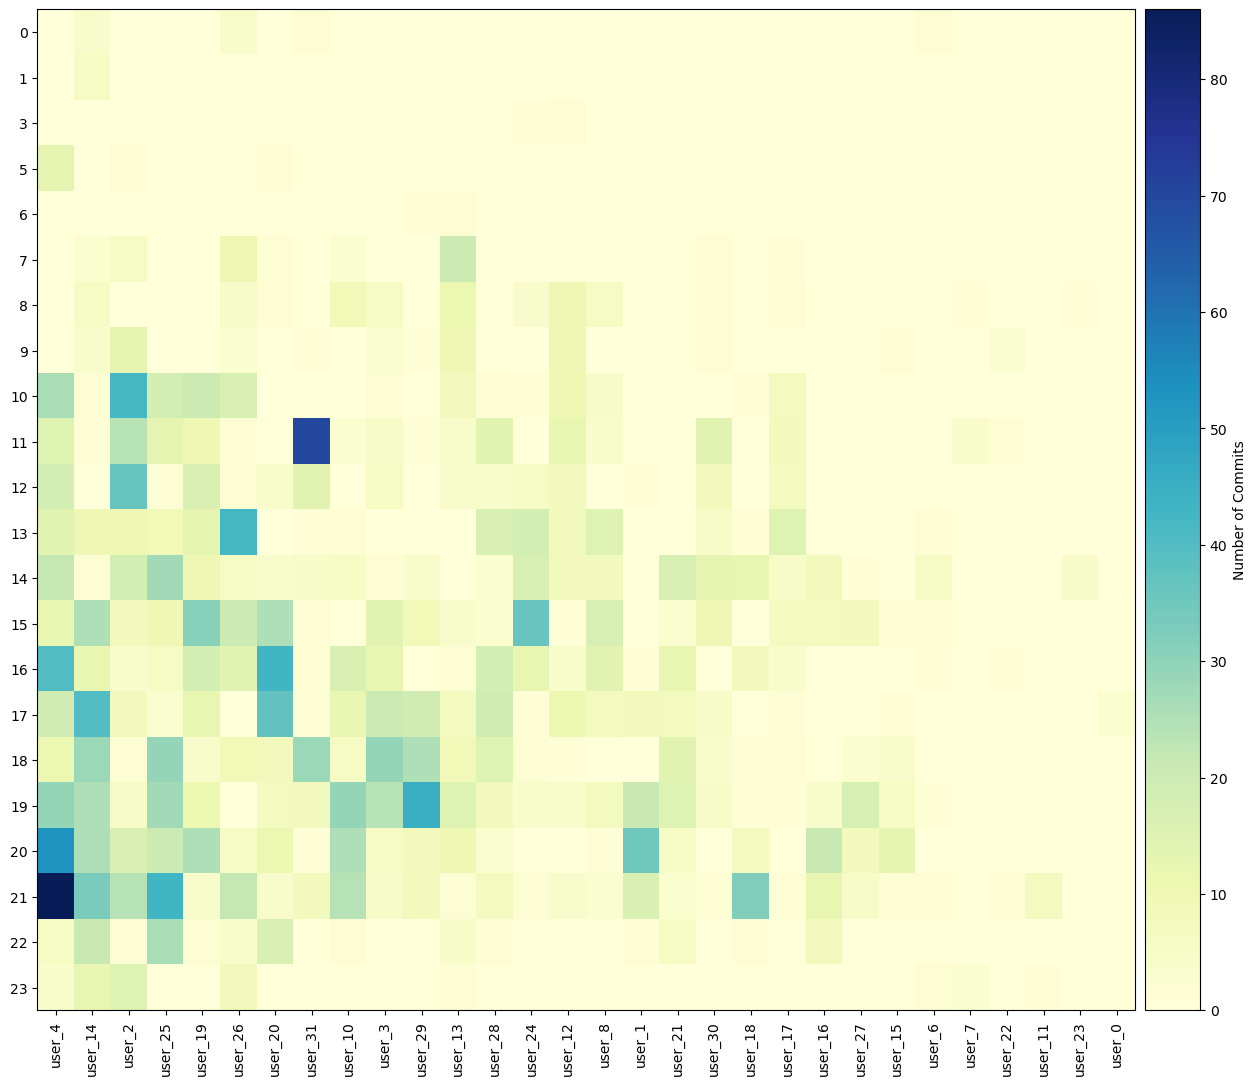

In [22]:
fig, ax = plt.subplots(figsize=(15, 13))
im = ax.imshow(hour_user.values, cmap='YlGnBu', aspect='auto')

ax.set_xticks(range(len(hour_user.columns)))
ax.set_xticklabels(hour_user.columns, rotation=90)
ax.set_yticks(range(len(hour_user.index)))
ax.set_yticklabels(hour_user.index)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax, label='Number of Commits')

plt.show()


## У какого пользователя больше всего коммитов во вт?

Ответ: user_14 или user_23 ( задании user_2)

## У какого пользователя больше всего коммитов в чт?


Ответ: user_26 (в задании 4)

## В какой будний день пользователи не любят делать много коммитов?

Ответ: Понедельник (в задании пятница)

## Какой пользователь в какой час сделал наибольшее количество коммитов?

Ответ: user_4 в 21 час

In [23]:
db.close()